In [1]:
import numpy as np
from timing import timed, compare

# Сортировка подсчётом - сортировка, не основанная на сравнении

Сортировка подсчётом — алгоритм сортировки, в котором используется диапазон чисел сортируемого массива (списка) для подсчёта совпадающих элементов. Применение сортировки подсчётом целесообразно лишь тогда, когда сортируемые числа имеют (или их можно отобразить в) диапазон возможных значений, который достаточно мал по сравнению с сортируемым множеством, например, миллион натуральных чисел меньших 1000.

## Задача
Первая строка содержит число $1 \le n \le 10^4$, вторая — $n$ натуральных чисел, не превышающих 10. Выведите упорядоченную по неубыванию последовательность этих чисел.

In [2]:
def count_sort(ar):
    lenght = max(ar) + 1
    counters = [0] * lenght
    for a in ar:
        counters[a] += 1
    ar_new = []
    for number in range(lenght):
        ar_new += [number] * counters[number] 
    return ar_new

## Тестирование

In [3]:
A = [1,2,3,5,4,5,6,6,5,9,5,56,0,482,265,264,413,35,55,454,5,454,5,2,2,55,6,2,2,5,4]
print(count_sort(A))

[0, 1, 2, 2, 2, 2, 2, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 9, 35, 55, 55, 56, 264, 265, 413, 454, 454, 482]


In [4]:
def test(low = 0,  high = 1000, size = 1000, n_iters = 1000):
    for _ in range(n_iters):
        random_size = np.random.randint(1, size)
        ar = np.random.randint(low, high, random_size).tolist()
        count_sort_ar = count_sort(ar)
        sort_ar = ar.copy()
        sort_ar.sort()
        assert count_sort_ar == sort_ar

In [5]:
try:
    test()
    print('Проверка прошла успешно!')    
except:
    print('Всё пропало, шеф!')

Проверка прошла успешно!


## Производительность

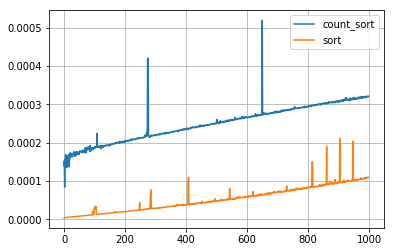

In [6]:
low, high, max_size = 1, 1000, 1000
arrs = []
for size in range(1, max_size):
        arrs.append(np.random.randint(low, high, size).tolist())
compare((count_sort, np.sort), arrs)